<img src="imgs/logo-spegc.svg" width=30%>

# K-Means

El algoritmo de clustering (agrupamiento) denominado **K-means** corresponde al tipo de aprendizaje no supervisado que se utiliza cuando tenemos datos no etiquetados (es decir, datos sin categorías o grupos definidos). El objetivo de este algoritmo es buscar agrupamientos en los datos, siendo **k** el número predefinido de grupos buscados. El algoritmo funciona iterativamente asignando cada muestra o punto del conjunto a uno de los K grupos. Las muestras se agrupan según la similitud de sus características. Los resultados del algoritmo de agrupamiento K-means son:

1. Los centroides de los clusters K, que se pueden usar para etiquetar nuevos datos

2. Etiquetas para los datos de entrenamiento (cada muestra se asigna a un solo grupo)

### Algoritmo

El algoritmo de agrupación de Κ-means utiliza un refinamiento iterativo para producir el resultado final. Las entradas del algoritmo corresponde al número de clústeres **K** junto con el conjunto de datos. El conjunto de datos es una colección de características de cada muestra. El algoritmo comienza con estimaciones iniciales para los Κ centroides, que pueden ser generados aleatoriamente o seleccionados aleatoriamente a partir del conjunto de datos. Una vez hecha la inicialización, el algoritmo itera entre estos dos pasos:

#### Paso de asignación de datos:

Cada centroide define uno de los clusters. En este paso, cada muestra se asigna a su centroide más cercano, en función de la distancia euclídea. Más formalmente, si $c_i$ es la colección de centroides del conjunto C, entonces cada muesta $x$ se asigna a un clúster mediante la siguiente expresión:

$$ \underset {c_i \in C} {\arg \min} \; dist (c_i, x)^2 $$

donde $dist(·)$ es la distancia euclídea estándar (L2).

#### Paso de actualización del centroide:

En este paso, los centroides se vuelven a calcular. Esto se hace tomando la media de todas las muestras asignadas al clúster de ese centroide.

$$ c_i = \frac{1}{| S_i |} \sum_ {x_i \in S_i} x_i $$

El algoritmo itera entre los pasos uno y dos hasta que se cumple algún criterio de detención (es decir, ninguna muestra cambia de clúster, la suma de las distancias se reduce al mínimo o se alcanza un número máximo de iteraciones).

Se garantiza que este algoritmo converge a un resultado. Sin embargo, el resultado puede ser un óptimo local (es decir, no necesariamente el mejor resultado posible), lo que significa que la evaluación de más de una ejecución del algoritmo con centroides iniciales aleatorios puede proporcionar un mejor resultado.

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

data = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

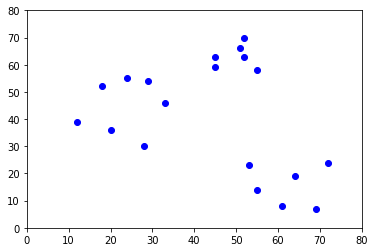

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data['x'], data['y'], c="b")
plt.xlim(0, 80)
plt.ylim(0, 80)

plt.show()

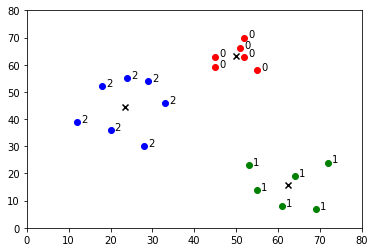

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
cx, cy = kmeans.cluster_centers_.T

colmap = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
for i, j, k in zip(data['x'], data['y'], kmeans.labels_):
    plt.scatter(i, j, color=colmap[k])

plt.scatter(cx, cy, c="k", marker='x')
plt.xlim(0, 80)
plt.ylim(0, 80)

for c, (i, j) in enumerate(zip(data['x'], data['y'])):
    plt.annotate(kmeans.labels_[c], (i+1, j))

plt.show()

In [12]:
samples_to_predict = [[20, 45], [65, 15], [70, 79]]
print("Predicción:")
print(kmeans.predict(samples_to_predict))

cluster_centers = kmeans.cluster_centers_

Predicción:
[2 1 0]


### ¿Cómo determinar un k adecuado?

La mejor agruapción se dará cuando el número de clusters sea igual al número de muestras, pero, obviamente, eso no tiene mucho sentido. Tampoco lo será el tener un solo grupo. Por lo tanto, deberemos ver cuántas agrupaciones podrían resultar adecuadas empezando por dos y terminando antes de llegar a tener el mismo número de grupos que de muestras. Para encontrar ese número $k$ "adecuado" debemos formular matemáticamente ese grado de adecuación. Una expresión intuituva podría ser, dado un $k$ determinado:

$$ E = \sum_ {i} \sqrt{(\mathbf{x}_i - \mathbf{c}_i)^2} $$

Donde $\mathbf{c}_i$ sería el centroide correspondiente de cada muestra. Ahora deberemos ir variando $k$ desde $2$ en adelente y obtendremos una gráfica como la de siguiente figura. Observaremos una figura semejante a un codo, ese codo  corresponderá a un posible $k$ adecuado.

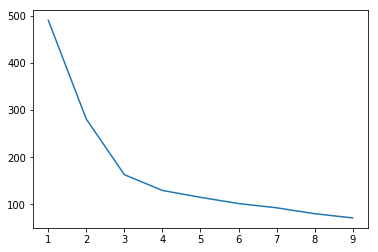

In [13]:
dist = lambda x1, y1, x2, y2 : np.sqrt((x1-x2)**2 + (y1-y2)**2)

max_k = 10
min_k = 1

s = np.zeros(max_k)

for k in range(min_k, max_k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    cx, cy = kmeans.cluster_centers_.T
    for i, j, l in zip(data['x'], data['y'], kmeans.labels_):
        s[k] += dist(i,j,cx[l],cy[l])

plt.plot(range(min_k, max_k), s[min_k:])
plt.show()

------------------------------
## Ejercicios

### Dataset Iris

El propósito de este ejercicio es agrupar en tres clusters los datos del dataset iris.

<img src="images/iris-machinelearning.png" width=60%>

In [14]:
from sklearn import datasets
iris = datasets.load_iris()

data = iris['data']
labels = iris['target']

km = KMeans(n_clusters=3, random_state=0).fit(data)

prediction = km.predict(data)

# Hacemos coincidir los números de las etiquetas con los clusters
prediction[prediction==1] = 666
prediction[prediction==0] = 1
prediction[prediction==666] = 0

#print(labels)
#print(prediction)

print("Número de muestras correctamente agrupadas:", sum(prediction==labels))

Número de muestras correctamente agrupadas: 134


#### Matriz de confusión

In [15]:
confusion_matrix = np.zeros((3,3), dtype=np.int)

for p, l in zip(prediction, labels):
    confusion_matrix[p][l] += 1
    
print(confusion_matrix)

[[50  0  0]
 [ 0 48 14]
 [ 0  2 36]]


### Dataset Digits

Number of digits: 1797


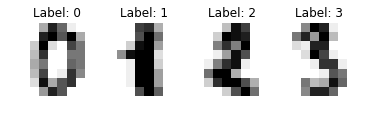

In [16]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

digits = load_digits()

print("Number of digits:", len(digits.data))

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

In [17]:
data = digits.data
labels = digits.target

km = KMeans(n_clusters=10, random_state=0).fit(data)
predictions = km.predict(data)

In [18]:
import scipy.stats

d = {}
for p, l in zip(predictions, labels):
    if p in d:
        d[p].append(l)
    else:
        d[p] = [l]
    
for i in range(10):
    print(i, list(labels).count(i))

dig = []

for i in range(10):
    v = {}
    v["len"] = len(d[i])
    v["moda"] = scipy.stats.mode(d[i]).mode[0]
    v["rep"] = d[i].count(v["moda"])
    dig.append(v["moda"])
    print(i, v)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180
0 {'len': 166, 'moda': 4, 'rep': 163}
1 {'len': 176, 'moda': 3, 'rep': 154}
2 {'len': 149, 'moda': 5, 'rep': 136}
3 {'len': 250, 'moda': 9, 'rep': 139}
4 {'len': 206, 'moda': 7, 'rep': 177}
5 {'len': 179, 'moda': 0, 'rep': 177}
6 {'len': 90, 'moda': 1, 'rep': 55}
7 {'len': 224, 'moda': 8, 'rep': 100}
8 {'len': 175, 'moda': 2, 'rep': 148}
9 {'len': 182, 'moda': 6, 'rep': 177}


#### Matriz de confusión

In [19]:
confusion_matrix = np.zeros((10,10), dtype=np.int)

for p, l in zip(predictions, labels):
    p = dig[p]
    confusion_matrix[p][l] += 1
    

print(confusion_matrix)

[[177   0   1   0   0   0   1   0   0   0]
 [  0  55   2   0   7   0   1   0   5  20]
 [  0  24 148   0   0   0   0   0   3   0]
 [  0   1  13 154   0   0   0   0   2   6]
 [  1   0   0   0 163   2   0   0   0   0]
 [  0   1   0   2   0 136   0   0   4   6]
 [  0   2   0   0   0   1 177   0   2   0]
 [  0   0   3   7   7   0   0 177   5   7]
 [  0  99   8   7   4   0   2   2 100   2]
 [  0   0   2  13   0  43   0   0  53 139]]
